# Sentiment Analysis for Trading
Guide: https://algotrading101.com/learn/sentiment-analysis-python-guide/

In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import nltk

## Import and Data Cleaning
Import headlines scrapped from Seeking Alpha's website  
https://seekingalpha.com/symbol/TSLA/news

In [3]:
df1 = pd.read_csv("tesla-headlines-sa.csv", encoding='windows-1250', header=None)
df1.columns = ['Title', 'Date']
df1

,Title,Date
0,"Tesla: Nothing Matters, Until Everything Matters","Montana Skeptic•Yesterday, 1:56 PM•600 Comments"
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments"
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments"
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments"
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments"
5,Tesla's Cybertruck Is Far From A Failure,"Long Term Tips•Mon, Dec. 2•450 Comments"
6,Tesla Cybertruck Peak Craziness,"Bill Maurer•Sun, Dec. 1•623 Comments"
7,Here's The Real Problem With Tesla's Cybertruck,"Sean Chandler•Sat, Nov. 30•585 Comments"
8,How The Big Tesla Battery Is Making Money,"Keith Williams•Mon, Nov. 25•812 Comments"
9,Tesla Cybertruck Event Falls Flat,"Bill Maurer•Fri, Nov. 22•995 Comments"


In [4]:
# Cleaning
# Variation 1: Yesterday
df1['Date'][0] = 'Dec. 9'

In [5]:
# Variation 2: Only the Date.
match = re.search(r'\w{3}\.\s\d{1,2}', df1['Date'][1])
modifiedDate = match[0] + ", 2019"
print(modifiedDate) # display modified

Dec. 6, 2019


In [6]:
# Variation 3: Both Date and Year
match = re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}', df1['Date'][1000])
print(match[0])

Mar. 27, 2018


In [7]:
# Variation 4: Specific to May. Without the dot.
print(df1['Date'][200]) # display original (without year)
match = re.search(r'\w{3}\s\d{1,2}', df1['Date'][200])
modifiedDate = match[0] + ", 2019"
print(modifiedDate) # display modified

print(df1['Date'][850]) # display original (with year)
match = re.search(r'\w{3}\s\d{1,2}\,\s\d{4}', df1['Date'][850])
print(match[0]) # display modified

Acolyte of Value•Mon, May 13•351 Comments
May 13, 2019
Quoth the Raven•May 17, 2018•123 Comments
May 17, 2018


In [8]:
# Extracting the date and inserting into the dataframe
newDateList = [] # create a list to store the cleaned dates

for dateOfArticles in df1['Date']: # loop every row in the "Date" column
    match = re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|May\s\d{1,2}\,\s\d{4}|\w{3}\.\s\d{1,2}|May\s\d{1,2}', 
                      dateOfArticles)

    if re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|\w{3}\s\d{1,2}\,\s\d{4}',match[0]):
        fulldate = match[0] # don't append year to string
    else:
        fulldate = match[0] + ", 2019" # append year to string
    
    for fmt in ('%b. %d, %Y', '%b %d, %Y'):
        try:
            newDate = datetime.strptime(fulldate, fmt).date()
            break # if format is correct, don't test any other formats
        except ValueError:
            pass
        
    newDateList.append(newDate) # add new date to the list

if(len(newDateList) != df1.shape[0]):
    print("Error: Rows don't match")
else:
    df1['New Date'] = newDateList # add the list to our original dataframe

In [9]:
df1.head()

,Title,Date,New Date
0,"Tesla: Nothing Matters, Until Everything Matters",Dec. 9,2019-12-09
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments",2019-12-06
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments",2019-12-04
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments",2019-12-03
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments",2019-12-03


# Sentiment Analysis
Using pre-trained models built by others. Lexicon-based sentiment analysis

In [10]:
# Using VADER Sentiment Analyzer. "Valence Aware Dictionary and sEntiment Reasoner"
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lester/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

results = []

for headline in df1['Title']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results[:10]

[{'neg': 0.349,
  'neu': 0.651,
  'pos': 0.0,
  'compound': -0.0382,
  'headline': 'Tesla: Nothing Matters, Until Everything Matters'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla: The Hype Does Not Reflect Reality'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla Will Likely Achieve Record Deliveries In Q4 Despite Headwinds'},
 {'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286,
  'compound': 0.25,
  'headline': 'Tesla: Automatic Labeling For Computer Vision'},
 {'neg': 0.0,
  'neu': 0.706,
  'pos': 0.294,
  'compound': 0.3612,
  'headline': 'Tesla: Ready To Re-Enter The Fast Lane'},
 {'neg': 0.398,
  'neu': 0.602,
  'pos': 0.0,
  'compound': -0.5106,
  'headline': "Tesla's Cybertruck Is Far From A Failure"},
 {'neg': 0.464,
  'neu': 0.536,
  'pos': 0.0,
  'compound': -0.3818,
  'headline': 'Tesla Cybertruck Peak Craziness'},
 {'neg': 0.31,
  'neu': 0.69,
  'pos': 0.0,
  'compound': -0.4019,
  'headline': "Here's The Re

In [44]:
# Only adding the compound score back to the dataframe
df1['Score'] = pd.DataFrame(results)['compound']

In [46]:
df1.head()

,Title,Date,New Date,Score
0,"Tesla: Nothing Matters, Until Everything Matters",Dec. 9,2019-12-09,-0.0382
1,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments",2019-12-06,0.0000
2,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments",2019-12-04,0.0000
3,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments",2019-12-03,0.2500
4,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments",2019-12-03,0.3612


In [47]:
# Aggregate daily sentiment scores
df2 = df1.groupby(['New Date']).sum()

# Import Stock Prices
Retrieved manually from Yahoo Finance from a specific date range

In [56]:
dfEodPrice = pd.read_csv("tsla-eod-prices.csv")
dfEodPrice['Date'] = dfEodPrice['Date'].astype('datetime64[ns]')
dfEodPrice2 = dfEodPrice.drop(['Open', 'High','Low','Close','Volume'], axis=1) # drop unwanted rows
dfEodPrice2.set_index('Date', inplace=True) # set Date coloumn as index
dfEodPrice2.head()

,Adj Close
Date,
2018-01-10,334.799988
2018-01-11,337.950012
2018-01-12,336.220001
2018-01-16,340.059998
2018-01-17,347.160004


In [58]:
# Calculate daily returns
dfEodPrice2['Returns'] = dfEodPrice2['Adj Close']/dfEodPrice2['Adj Close'].shift(1) - 1
dfEodPrice2.head()

,Adj Close,Returns
Date,,
2018-01-10,334.799988,NaN
2018-01-11,337.950012,0.009409
2018-01-12,336.220001,-0.005119
2018-01-16,340.059998,0.011421
2018-01-17,347.160004,0.020879


In [59]:
# Check r/s between lagged score against daily returns. Compare yesterday's headlines with today's stock returns
# One-day lagged sentiment score.
df2['Score(1)'] = df2.shift(1)
df2.head()

,Score,Score(1)
New Date,,
2018-01-11,0.0000,NaN
2018-01-15,0.5719,0.0000
2018-01-16,-0.1027,0.5719
2018-01-17,-0.1280,-0.1027
2018-01-18,0.0000,-0.1280


In [75]:
# Merge left for trading days only. There are trading days with news and non-trading days with no news. 
dfEodPrice3 = pd.merge(dfEodPrice2[['Returns']], df2[['Score(1)']], left_index=True, right_index=True, how='left')
dfEodPrice3.head()

,Returns,Score(1)
Date,,
2018-01-10,NaN,NaN
2018-01-11,0.009409,NaN
2018-01-12,-0.005119,NaN
2018-01-16,0.011421,0.5719
2018-01-17,0.020879,-0.1027


In [82]:
dfReturnsScore = dfEodPrice3.fillna(0)
dfReturnsScore.head()

,Returns,Score(1)
Date,,
2018-01-10,0.000000,0.0000
2018-01-11,0.009409,0.0000
2018-01-12,-0.005119,0.0000
2018-01-16,0.011421,0.5719
2018-01-17,0.020879,-0.1027


# Checking for Relationship
Between Sentiment and Stock Prices  
Arbitrary sentiment between -0.5 and 0.5 to be insignificant

In [83]:
# Remove insignificant sentiment scores
dfReturnsScore2 = dfReturnsScore[(dfReturnsScore['Score(1)'] > 0.5) | (dfReturnsScore['Score(1)'] < -0.5)]
dfReturnsScore2.head()

,Returns,Score(1)
Date,,
2018-01-16,0.011421,0.5719
2018-01-26,0.015431,-0.5277
2018-02-02,-0.015748,-1.3591
2018-02-08,-0.086290,-1.6275
2018-02-09,-0.015259,-0.9171


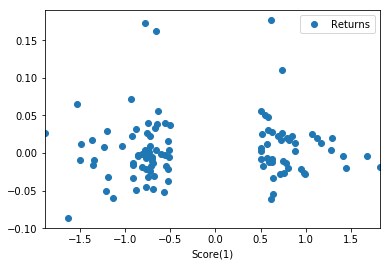

In [85]:
dfReturnsScore2.plot(x="Score(1)", y="Returns", style = "o")

In [86]:
# Correlation analysis
dfReturnsScore2['Returns'].corr(dfReturnsScore2['Score(1)'])

0.044623813315777694

# Conclusion
Correlation coefficient of 0.044 is close to 0, inferring that the article headlines alone do not have predictive value for tomorrow's stock returns

# Areas of Improvement

1. Splitting headline into (1) Sensational News (2) Fundamentals-related ones
2. Relative scoring to other stocks
3. Removal of high impact dates eg. Earnings call, GDP release, elections, etc
4. Accuracy of VADER sentiment analyser. Can train your own lexicon-based analyser.
5. Perhaps the change in the scoring would be more useful than the absolute score itself. Detect if sentiment changed on a company over time
6. Source for headlines from more than one sources
7. Complement headline data with other types of data (images, web scrapping, etc)